<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [104]:
# Step 1: Download the dataset
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey_data_1.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [38]:
df['ConvertedCompYearly'].unique()

array([    nan,   7322.,  30074., ...,  15637.,   9711., 116844.],
      shape=(6114,))

In [39]:
## Write your code here

comp_data = df.dropna(subset=['ConvertedCompYearly'])


In [ ]:

# Remove outliers in ConvertedCompYearly using IQR method
Q1 = comp_data['ConvertedCompYearly'].quantile(0.25)
Q3 = comp_data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = comp_data[(comp_data['ConvertedCompYearly'] >= Q1 - 1.5 * IQR) & (comp_data['ConvertedCompYearly'] <= Q3 + 1.5 * IQR)]


In [50]:
filtered_df['ConvertedCompYearly'].value_counts().head()

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
Name: count, dtype: int64

Text(0.5, 0, 'Compensation')

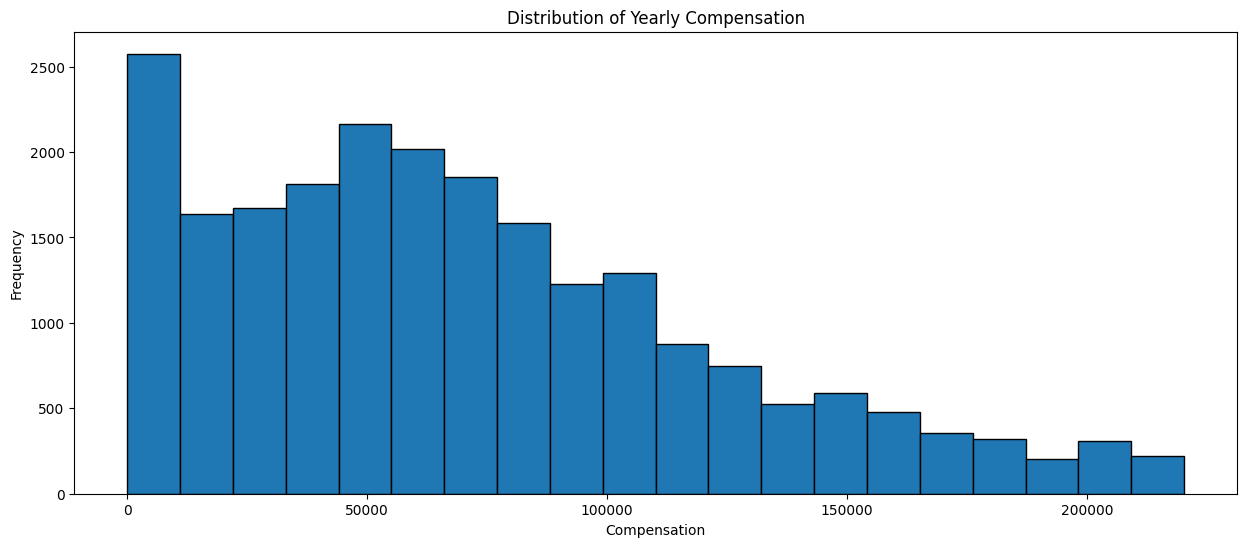

In [51]:
filtered_df['ConvertedCompYearly'].plot(kind='hist', bins=20, edgecolor='black', title='Distribution of Yearly Compensation', figsize=(15,6))
plt.xlabel('Compensation')

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [52]:
## Write your code here
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [61]:
age_map = {
    'Under 18 years old':15,
    '35-44 years old':40,
    '45-54 years old':50,
    '18-24 years old':20,
    '25-34 years old':30,
    '55-64 years old':60,
    'Prefer not to say':0,
    '65 years or older':70
}

df['Age_num'] = df['Age'].map(age_map)

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [62]:
## Write your code here
scat_data = df[['Age_num', 'ConvertedCompYearly']].dropna()

# Remove outliers in ConvertedCompYearly using IQR method
Q1 = scat_data['ConvertedCompYearly'].quantile(0.25)
Q3 = scat_data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = scat_data[(scat_data['ConvertedCompYearly'] >= Q1 - 1.5 * IQR) & (scat_data['ConvertedCompYearly'] <= Q3 + 1.5 * IQR)]


<Axes: xlabel='ConvertedCompYearly', ylabel='Age_num'>

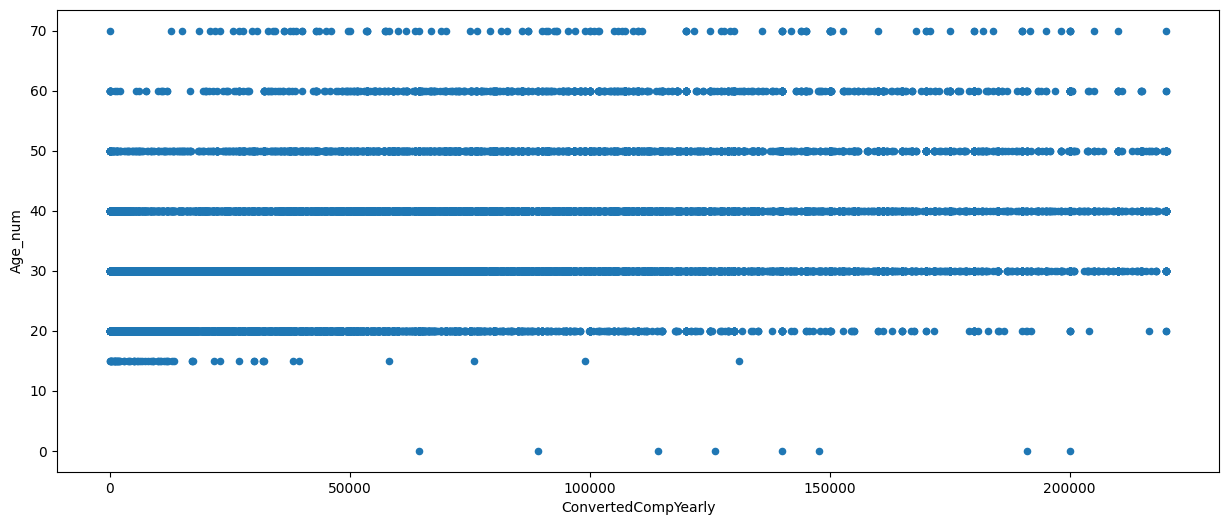

In [63]:
filtered_df.plot(kind='scatter', y='Age_num', x='ConvertedCompYearly', figsize=(15,6))

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


In [87]:
## Write your code here

caj_data = df.dropna(subset=['Age_num', 'ConvertedCompYearly', 'JobSatPoints_6']) 

# Remove outliers in ConvertedCompYearly using IQR method
Q1 = caj_data['ConvertedCompYearly'].quantile(0.25)
Q3 = caj_data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = caj_data[(caj_data['ConvertedCompYearly'] >= Q1 - 1.5 * IQR) & (caj_data['ConvertedCompYearly'] <= Q3 + 1.5 * IQR)]


In [88]:
import seaborn as sns

In [89]:
filtered_df = filtered_df.groupby(['JobSatPoints_6', 'Age_num'])['ConvertedCompYearly'].mean().reset_index()

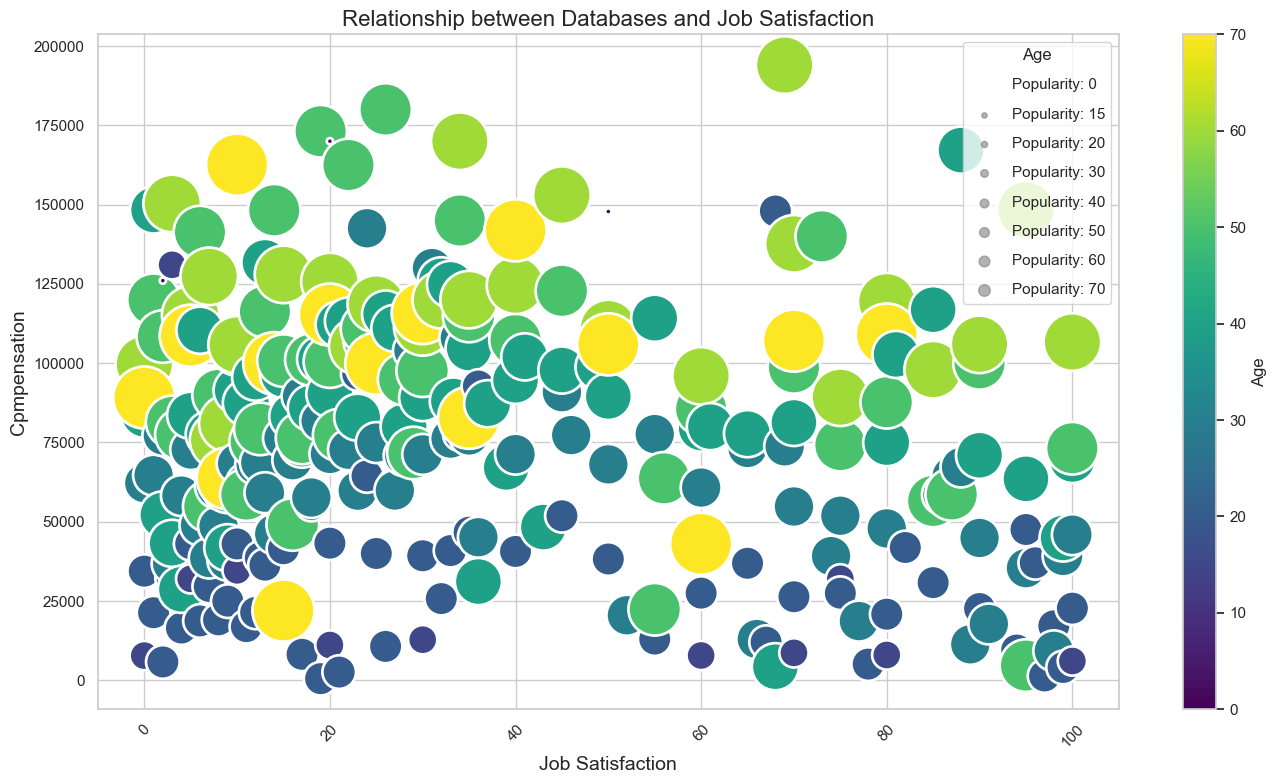

In [92]:
# Create bubble plot
sns.set(style="whitegrid")

fig, ax  = plt.subplots(figsize=(14, 8))
sns.scatterplot(
    data=filtered_df,
    x='JobSatPoints_6',
    y='ConvertedCompYearly',
    size='Age_num',
    sizes=(20, 2000),
    hue='Age_num',
    legend=False,
    palette='viridis',ax=ax
)

# Bubble size legend
for size in [0, 15,20,30,40,50,60,70]:
    ax.scatter([], [], s=size, c='gray', alpha=0.6, label=f'Popularity: {size}')
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Age')

# Colorbar for hue
norm = plt.Normalize(filtered_df['Age_num'].min(), filtered_df['Age_num'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Age')

plt.title('Relationship between Databases and Job Satisfaction', fontsize=16)
plt.xlabel('Job Satisfaction', fontsize=14)
plt.ylabel('Cpmpensation', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [93]:
## Write your code here
df['MainBranch'].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [94]:
barh = df['MainBranch'].dropna().value_counts()

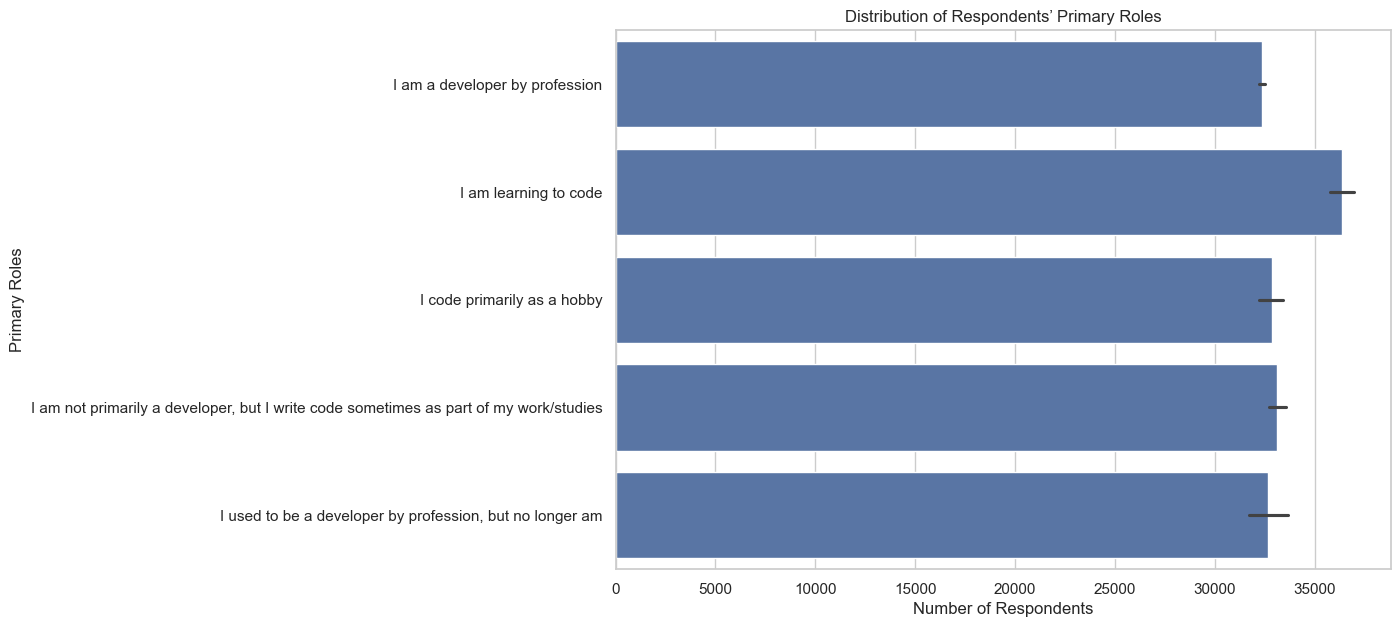

In [106]:
plt.figure(figsize=(10,7))
sns.barplot(y=barh.values, x=barh.index)
plt.title('Distribution of Respondents’ Primary Roles')
plt.ylabel('Primary Roles')
plt.xlabel('Number of Respondents')
plt.show()
          

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [110]:
## Write your code here
lang = df['LanguageWantToWorkWith'].dropna().str.split(';')
all_lang = lang.explode()
lang_counts = all_lang.value_counts()
top5_languages = lang_counts.head(5)
top5_languages

LanguageWantToWorkWith
Python        25047
JavaScript    23774
SQL           22400
HTML/CSS      20721
TypeScript    20239
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_10092\3051040980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_languages.index, y=top5_languages.values, palette='viridis')


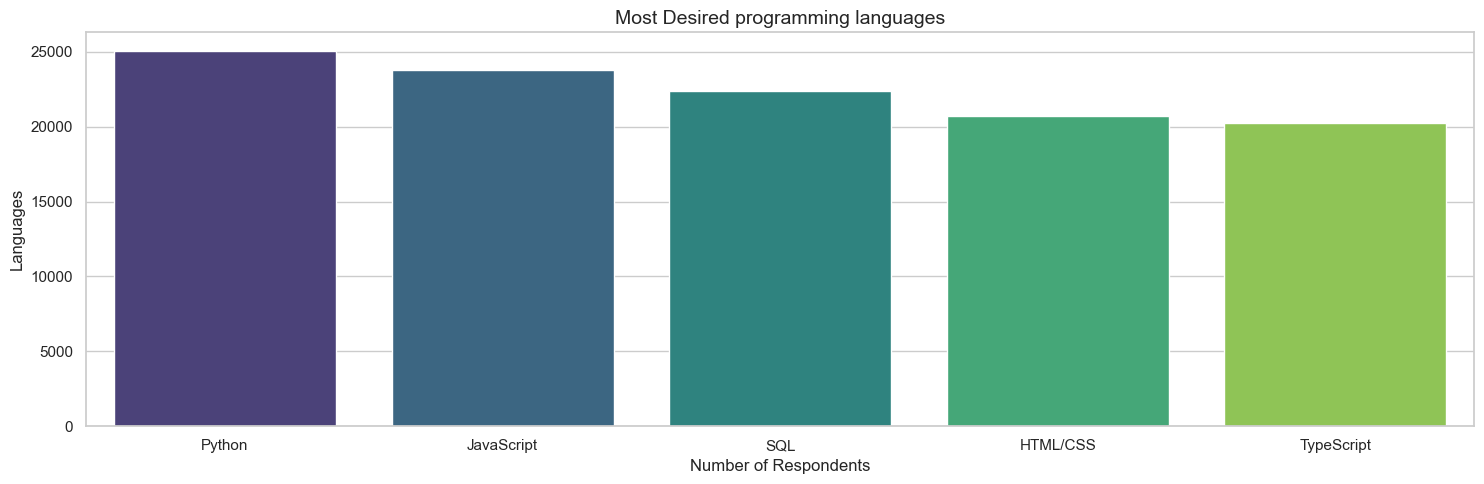

In [111]:
plt.figure(figsize=(15,5))
sns.barplot(x=top5_languages.index, y=top5_languages.values, palette='viridis')

plt.title('Most Desired programming languages', fontsize=14)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Languages', fontsize=12)
plt.tight_layout()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [116]:
## Write your code here
jobbyage_df = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Age'])

In [119]:
median_data = jobbyage_df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()
median_data

,Age,JobSatPoints_6,JobSatPoints_7
0,18-24 years old,15.0,20.0
1,25-34 years old,20.0,15.0
2,35-44 years old,20.0,15.0
3,45-54 years old,20.0,15.0
4,55-64 years old,20.0,20.0
5,65 years or older,20.0,15.0
6,Prefer not to say,10.0,7.0
7,Under 18 years old,1.5,5.0


C:\Users\HP\AppData\Local\Temp\ipykernel_10092\1821549731.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


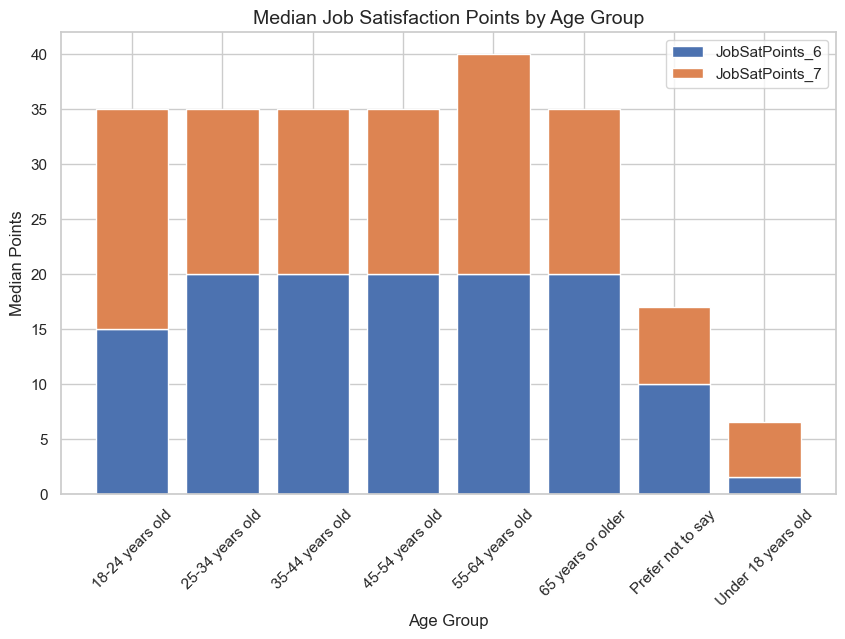

In [123]:
# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(median_data['Age'], median_data['JobSatPoints_6'], label='JobSatPoints_6')
bar2 = ax.bar(median_data['Age'], median_data['JobSatPoints_7'], bottom=median_data['JobSatPoints_6'], label='JobSatPoints_7')

# Customize plot
ax.set_title('Median Job Satisfaction Points by Age Group', fontsize=14)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Median Points', fontsize=12)
ax.legend()
plt.xticks(rotation=45)
fig.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [124]:
## Write your code here
dbs = df['DatabaseHaveWorkedWith'].dropna().str.split(';')
all_dbs = dbs.explode()
dbs_count = all_dbs.value_counts()
top10_db = dbs_count.head(10)

In [125]:
top10_db

DatabaseHaveWorkedWith
PostgreSQL              25536
MySQL                   21099
SQLite                  17365
Microsoft SQL Server    13275
MongoDB                 13007
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5273
Dynamodb                 4138
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_10092\3453135146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_db.values, y=top10_db.index, palette='viridis')


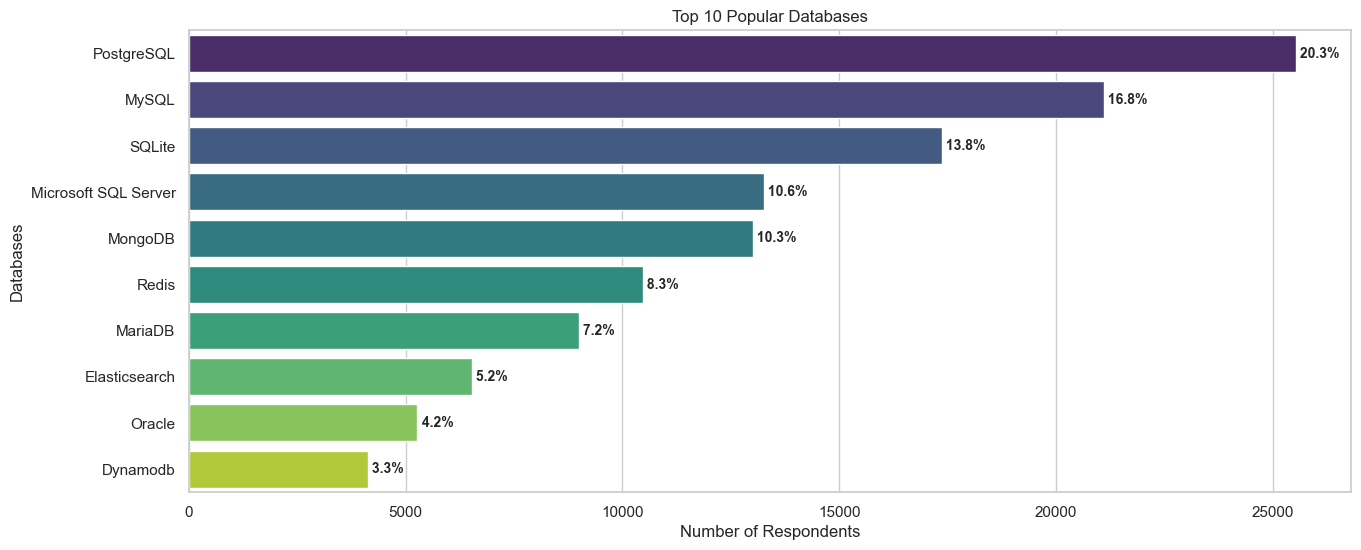

In [140]:
plt.figure(figsize=(15,6))
sns.barplot(x=top10_db.values, y=top10_db.index, palette='viridis')
plt.title('Top 10 Popular Databases')
plt.xlabel('Number of Respondents')
plt.ylabel('Databases')

# Add value labels to each bar
# To add percentage as bar label
total = top10_db.values.sum()

for index, value in enumerate(top10_db.values):
    pct = (value/total)*100
    lbl = f'{pct: .1f}%'
    plt.text(value + 0.5, index, lbl, va='center', fontsize=10, fontweight='bold')


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here
comp_age = df.dropna(subset=['Age', 'ConvertedCompYearly']) 

# Remove outliers in ConvertedCompYearly using IQR method
Q1 = comp_age['ConvertedCompYearly'].quantile(0.25)
Q3 = comp_age['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = comp_age[(comp_age['ConvertedCompYearly'] >= Q1 - 1.5 * IQR) & (comp_age['ConvertedCompYearly'] <= Q3 + 1.5 * IQR)]

In [142]:
med_comp = comp_age.groupby('Age')['ConvertedCompYearly'].median().reset_index()
med_comp

,Age,ConvertedCompYearly
0,18-24 years old,25000.0
1,25-34 years old,59825.0
2,35-44 years old,84796.0
3,45-54 years old,99099.0
4,55-64 years old,109691.0
5,65 years or older,106000.0
6,Prefer not to say,140000.0
7,Under 18 years old,7626.5


C:\Users\HP\AppData\Local\Temp\ipykernel_10092\2627605890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= med_comp['Age'], y=med_comp['ConvertedCompYearly'], palette='viridis')


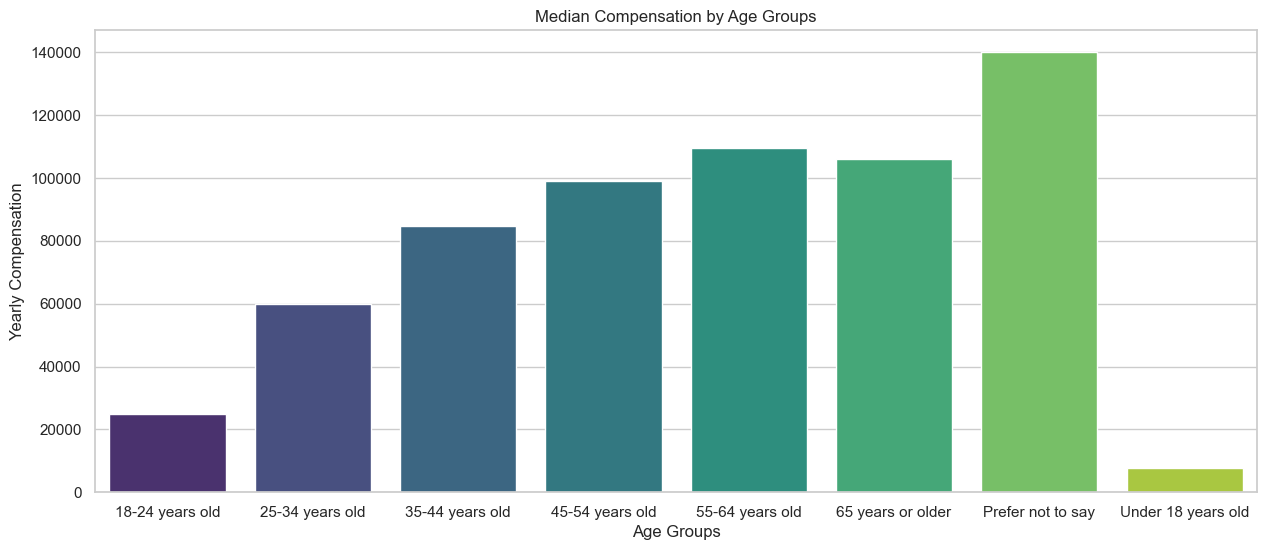

In [144]:
plt.figure(figsize=(15,6))
sns.barplot(x= med_comp['Age'], y=med_comp['ConvertedCompYearly'], palette='viridis')
plt.title('Median Compensation by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Yearly Compensation')
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [145]:
## Write your code here
country = df['Country'].dropna()
country

0                                 United States of America
1        United Kingdom of Great Britain and Northern I...
2        United Kingdom of Great Britain and Northern I...
3                                                   Canada
4                                                   Norway
                               ...                        
65413                                                India
65415                                                India
65428                                                India
65431                                              Belgium
65435                                              Germany
Name: Country, Length: 58930, dtype: object

In [146]:
country.reset_index()

,index,Country
0,0,United States of America
1,1,United Kingdom of Great Britain and Northern I...
2,2,United Kingdom of Great Britain and Northern I...
3,3,Canada
4,4,Norway
...,...,...
58925,65413,India
58926,65415,India
58927,65428,India
58928,65431,Belgium


In [156]:
county_count = country.value_counts()
county_count

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

In [157]:
top10countries = county_count.head(10)

Text(0, 0.5, 'Number of Respondents')

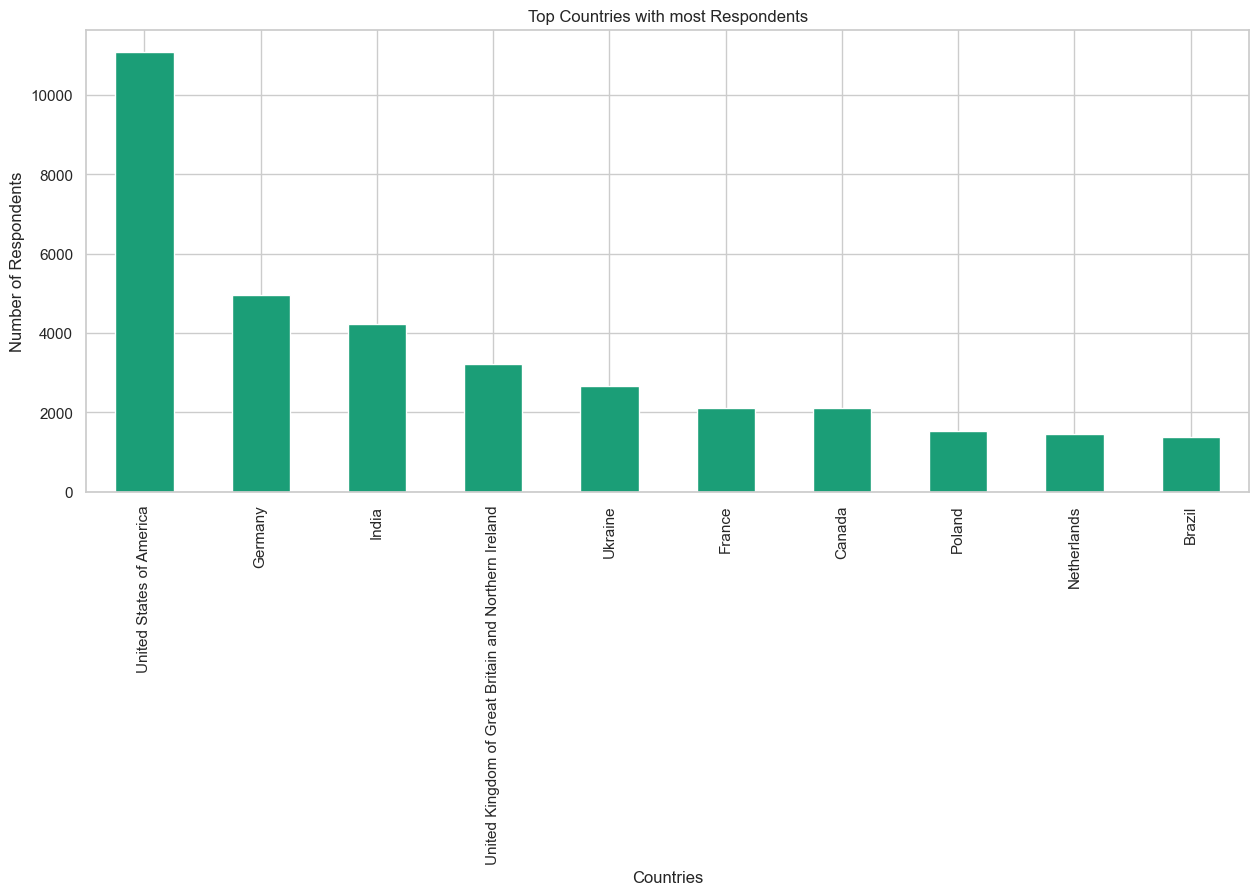

In [159]:
plt.figure(figsize=(15,6))
top10countries.plot(kind='bar', colormap='Dark2')
plt.title('Top Countries with most Respondents')
plt.xlabel('Countries')
plt.ylabel('Number of Respondents')

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
